In [1]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt

In [5]:
base_imgs = imread("base_imgs.png")
base_imgs_cartoon = imread("base_imgs_cartoon.png")

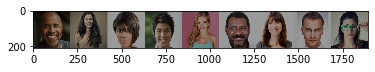

In [6]:
plt.imshow(base_imgs);

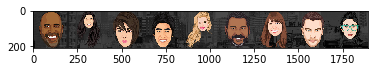

In [7]:
plt.imshow(base_imgs_cartoon);

In [311]:
x = 45
# y = 490
y = 1100
d = 80
img_sample = base_imgs.copy()[(x):(x+d), (y):(y+d)]
img_c_sample = base_imgs_cartoon.copy()[(x):(x+d), (y):(y+d)]
img_sample.shape

(80, 80, 3)

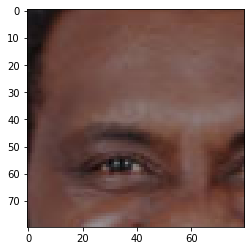

In [312]:
plt.imshow(img_sample);

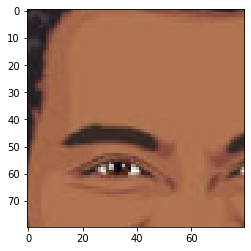

In [313]:
plt.imshow(img_c_sample);

In [314]:
MAX_V = 0
MIN_V = 0.2

In [315]:
value_range = np.linspace(MIN_V, MAX_V, 1000)

In [316]:
def map_maker(a,b):
    def mapper(x):
        return (np.tanh(10**16*(x - a)) - np.tanh(10**16*(x - b)))/2
    return mapper

In [317]:
t = 1
a = 0.02
b = 0.075
img_basic = img_c_sample
core_c = img_basic[t:-t, t:-t]
value = 0
c_dif = np.array([])
for shift in [t, -t]:
    for axis in [0, 1]:
        img = np.roll(img_basic, shift = shift, axis = axis)[t:-t, t:-t]
        dif = np.reshape(np.mean(np.abs(img - core_c), axis = 2), -1)
        c_dif = np.concatenate([c_dif, dif])
        map_value = list(map(map_maker(a,b), dif))
        value += np.mean(map_value)
print(value)
img_basic = img_sample
core_c = img_basic[t:-t, t:-t]
value = 0
m_dif = np.array([])
for shift in [t, -t]:
    for axis in [0, 1]:
        img = np.roll(img_basic, shift = shift, axis = axis)[t:-t, t:-t]
        dif = np.reshape(np.mean(np.abs(img - core_c), axis = 2), -1)
        m_dif = np.concatenate([m_dif, dif])
        map_value = list(map(map_maker(a,b), dif))
        value += np.mean(map_value)
print(value)

0.5016436554898094
0.6431623931623931


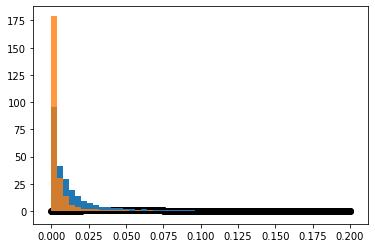

In [306]:
plt.hist(c_dif, bins = 50, range=(0,0.2), density = True);
plt.hist(m_dif, bins = 50, range=(0,0.2), density = True, alpha = 0.8);
map_value = list(map(map_maker(a,b), value_range))
plt.scatter(x = value_range, y = map_value, color = 'black');